# <center> Intro to Network Analysis </center>

![ ](https://static1.squarespace.com/static/5845ca191b631bbae287b8f5/59d29f9859cc68d3d924f14a/5bae681d15fcc053c6d31c20/1538159128027/javascript.jpg?format=1500w)

In [1]:
import networkx as nx
import requests
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

## Download data using VK API

Let's download a list of your friends from VK and try to plot a graph to analyze its structure. 

We will download the **attributes** of users:
* First name + last name
* Sex
* Birthday
* City
* Education info
* Number of friends

**WARNING. There are ways to write this code (functions) in much prettier and compact way, but we will use the following brute force solutions in order to show simplier logic and the use of logical operators.** You can try to write your own functions as your home work on improving programming skills.

In [2]:
my_id = '6395751' # user id (try your own)
api_version = '5.103' # https://vk.com/dev/versions

with open('secret_token.txt') as f: # copy this from your VK app (see previous seminar)
    token = f.read()

In [3]:
# Get total number of friends and list with their ids 

def get_ids_friends(user_id):
    
    method = 'friends.get'
    friends_url = 'https://api.vk.com/method/{}?user_id={}&v={}&access_token={}'
    json_response = requests.get(friends_url.format(method, user_id, api_version, token)).json()
    if json_response.get('Error'):
        print(json_response.get('Error'))
        return list()
    
    return json_response['response']

In [4]:
# Get information for each friend

def get_info(user_id):
    
    names = {} # dict()
    sex = {}
    cities = {}
    bdays = {}
    education = {}
    
    method = 'friends.get'
    fields = 'first_name,city,sex,bdate,education'
    friends_url = 'https://api.vk.com/method/{}?user_id={}&fields={}&lang=en&v={}&access_token={}'
    json_response = requests.get(friends_url.format(method, user_id, fields, api_version, token)).json()
    if json_response.get('Error'):
        print(json_response.get('Error'))
        return list(), list(), list(), list(), list()
    
    for friend in json_response['response']['items']:
        names[friend['id']] = friend['first_name'] + ' ' + friend['last_name']
        sex[friend['id']] = friend['sex']
        cities[friend['id']] = [friend['city'] if 'city' in friend.keys() else 'Null'][0]
        bdays[friend['id']] = [friend['bdate'] if 'bdate' in friend.keys() else 'Null'][0]
        try:
            education[friend['id']] = friend['university_name'] + ', ' + friend['faculty_name']
        except:
            education[friend['id']] = 'Null'
            
    return names, sex, cities, bdays, education

Now, we create a graph:

In [5]:
friend_ids = get_ids_friends(my_id)

In [6]:
names, sex, cities, bdays, education = get_info(my_id)

In [ ]:
# Task 1
# Get a set of all unique city names from 'cities' 


In [ ]:
# Task 2
# How many friends there are? Hint: use 'names'


In [ ]:
# Task 3
# How many friends have posted information about their education?


# Now, we can create a graph based on our data 

**Graph** is a mathematical structure used to model pairwise relations between objects. 

Graph consists of **nodes** and **edges**. 

[Seven bridges problem](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg#:~:text=The%20Seven%20Bridges%20of%20K%C3%B6nigsberg,prefigured%20the%20idea%20of%20topology.)

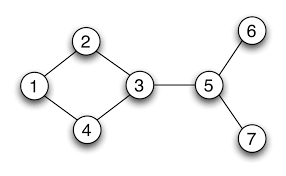
![ ](https://upload.wikimedia.org/wikipedia/commons/5/5d/Konigsberg_bridges.png)

Ways to present a graph: 

(1) **Adjacency list**

Store number of adjacent nodes for each node: <br>
{1: [2, 5],<br>2: [1,3,4,5],<br>3: [2, 4], <br>4: [2,3,5],<br>5: [1,2,4]}

or

store edges using lists: <br>
{ 1: [[1, 2], [1, 5]], <br>2: [[2, 1], [2, 3], [2, 4], [2, 5]], <br>3: [[3, 2], [3, 4]], <br>4: 
[[4, 2], [4, 3], [4, 5]],<br>5: [[5, 1], [5,2],[5,4]] }

(2) **Adjacency matrix** (N $\cdot$ N nodes)

[[0, 1, 1, 0], <br> [0, 0, 3, 0], <br> [0, 0, 0, 4], <br> [5, 0, 0, 0]]<br>

![](http://staff.ustc.edu.cn/~csli/graduate/algorithms/book6/466_a.gif)

In [7]:
graph = {} # dict()

for friend_id in tqdm(friend_ids['items']):
    if names[friend_id] not in graph.keys():
        try:
            friends_names, _, _, _, _ = get_info(friend_id)
        except:
            pass
        if friends_names != []:
            graph[names[friend_id]] = {}
            graph[names[friend_id]]['friends'] = list(friends_names.values())
            graph[names[friend_id]]['sex']  = sex[friend_id]
            graph[names[friend_id]]['cities']  = cities[friend_id]
            graph[names[friend_id]]['bdays']  = bdays[friend_id]
            graph[names[friend_id]]['education']  = education[friend_id]
            graph[names[friend_id]]['num_friends'] = len(graph[names[friend_id]]['friends'])

100%|██████████| 445/445 [02:48<00:00,  2.64it/s]


In [17]:
# Task 4
# Display info on number of friends from a graph for the first 3 random friends of yours


Graphs can be directed and undirected. 

![](https://www.researchgate.net/profile/Debojoti_Kuzur/publication/282653028/figure/fig2/AS:282176378687493@1444287499817/Directed-and-Undirected-graph-Ref-7.png)

In [19]:
# Create undirected graph

G = nx.Graph(directed=False)

# Connect friends with each other
for i in tqdm(list(graph.keys())):
    G.add_node(i)
    for j in graph[i]['friends']:
        if i != j and i in list(names.values()) and j in list(names.values()):
            G.add_edge(i, j)
    G.nodes[i]['sex'] = graph[i]['sex']
    G.nodes[i]['cities'] = [graph[i]['cities']['title'] if graph[i]['cities'] != 'Null' else 'Null'][0]
    G.nodes[i]['bdays'] = graph[i]['bdays']
    G.nodes[i]['numf'] = graph[i]['num_friends']
    G.nodes[i]['edu'] = graph[i]['education']

100%|██████████| 428/428 [00:03<00:00, 139.74it/s]


In [21]:
for i in list(graph.keys()):
    print(G.nodes[i])
    break

{'sex': 2, 'cities': 'Moscow', 'bdays': '17.2', 'numf': 2420, 'edu': 'НИУ ВШЭ (ГУ-ВШЭ), Факультет экономических наук'}


In [22]:
# Save our dataset as graph
nx.write_gml(G, "my_social_network.gml")

In [ ]:
# pandas dataframe 

df = pd.DataFrame.from_dict(graph, orient='index').reset_index()
df.rename(columns={'index': 'name'}, inplace=True)
df.head(20)

In [ ]:
# From numbers to names

num2sex = {0: 'Undefined', 1: 'F', 2: 'M'}
df['sex'] = df['sex'].map(num2sex)
df.head(5)

In [ ]:
# From numbers to bins (categories)

bins = [0, 50, 100, 200, 300, np.inf]
names = ['<50', '50-100', '101-200', '201-300', '300+']

df['num_friends_bins'] = pd.cut(df['num_friends'], bins, labels=names)
df.head(5)

## My Network Summary

In [58]:
G = nx.read_gml('my_social_network.gml')

In [34]:
print('Order (number of nodes):', nx.number_of_nodes(G))
print('Size (number of edges):', nx.number_of_edges(G))
print('Number of connected components:', nx.number_connected_components(G))

Order (number of nodes): 428
Size (number of edges): 5617
Number of connected components: 5


In [59]:
# Get sorted connected components of graph
# Calculate diameter and radius of the largest component
sorted_cc = sorted(nx.connected_components(G), key = len, reverse=True)
sub_graph = G.subgraph(sorted_cc[0])
print('Radius:', nx.radius(sub_graph))
print('Diameter:', nx.diameter(sub_graph))

Radius: 2
Diameter: 4


![](https://www.researchgate.net/profile/Mohammad_Masoud4/publication/280012327/figure/fig1/AS:284598362755093@1444864945560/Example-of-Graph-diameter-and-radius.png)

In [36]:
print('Order (number of nodes) of the largest component:', nx.number_of_nodes(sub_graph))
print('Size (number of edges) of the largest component:', nx.number_of_edges(sub_graph))

Order (number of nodes) of the largest component: 424
Size (number of edges) of the largest component: 5617


The number of friends in the largest component of this network shows that the graph is almost connected. It can be explained by highly possible connections among the people in this network. Most of them know each other or have mutual friends. The most part of my 428 friends continued their secondary or higher education in Moscow and they keep living and working here. As far as I was born in Moscow, most of my friends from school also entered the same sports club and the university (HSE). In addition, a lot of my friends from HSE and MIPT universities are affiliated to the same travel club 'I like trip' at HSE. For this reason, many friends of mine know each other and the network's greatest distance between any two persons is quite low. 

As we may observe, the largest component contains almost all nodes of the graph. If we have excluded 4 persons from the dataset, we could say, that that the graph is connected. I decided to focus just on the largest component, rather than the whole network, so I can use the characteristics of a complete subgraph.

Text(0, 0.5, 'Number of nodes')

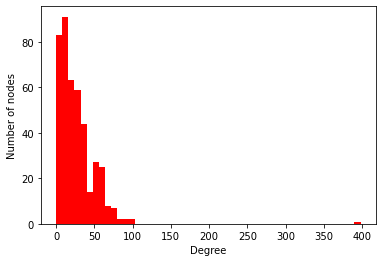

In [51]:
# Degree distribution -- number of common friends
k = G.degree()
k = np.array(list(dict(k).values()))
n, bins, patches = plt.hist(k, bins = 50, facecolor='r')
plt.xlabel("Degree")
plt.ylabel("Number of nodes")

Text(0, 0.5, 'Number of nodes')

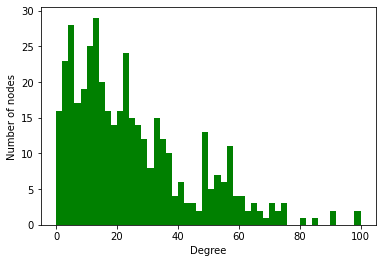

In [52]:
# Degree distribution of the largest component (subgraph) obviously looks almost the same
k = sub_graph.degree()
k = np.array(list(dict(k).values()))
n, bins, patches = plt.hist(k, bins = 50, facecolor='g')
plt.xlabel("Degree")
plt.ylabel("Number of nodes")

In [68]:
# TASK
# Find outlier in order to delete it

max(sub_graph.degree(), key=lambda x: x[1])

('DELETED ', 398)

In [69]:
# Get rid of outlier
G.remove_node('DELETED ')

In [ ]:
# Task
# Run the cells with plots once again and see the difference


In [70]:
nodes_degree = list(dict(G.degree()).values())

print(f'Max value of node degree = {np.max(nodes_degree)}')
print(f'Mean value of node degree = {np.mean(nodes_degree)}')

Max value of node degree = 100
Mean value of node degree = 24.44496487119438


## Network Visualization

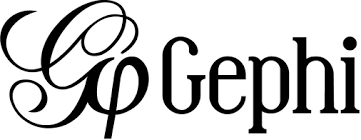

We can use Gephi application to visualize the dataset. Down below are plotted different representations, all of them present the same network.

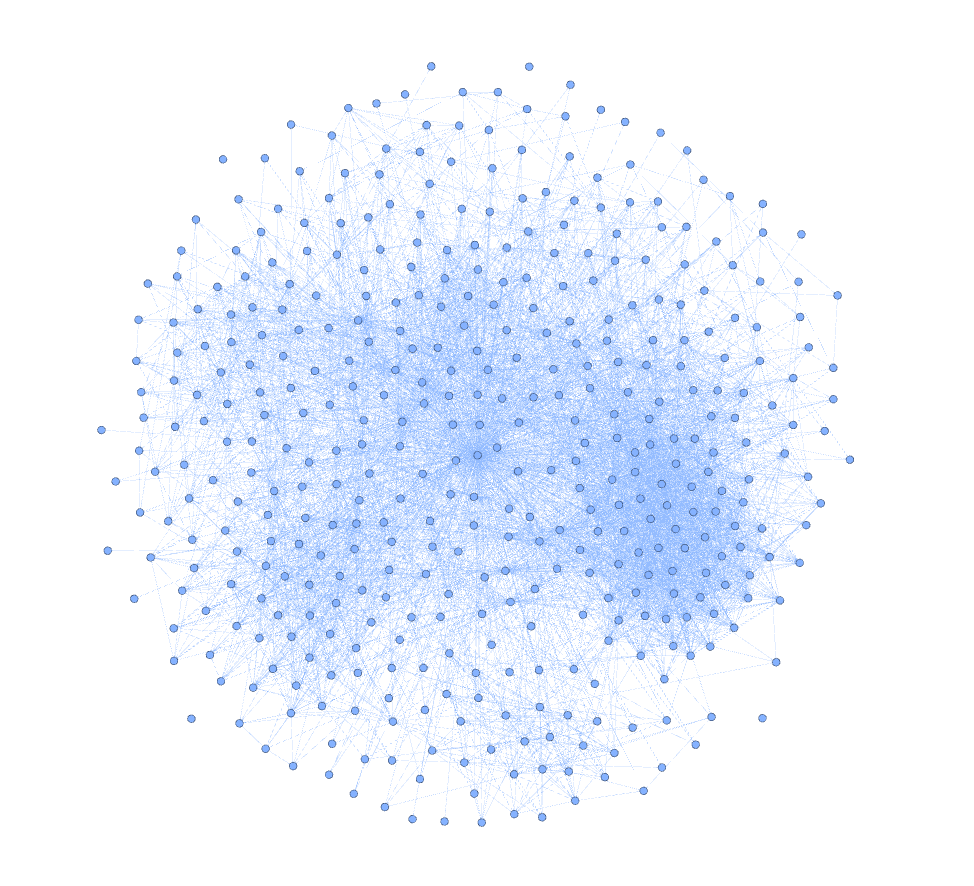

In [118]:
# Fruchterman Reingold layout
from IPython.display import Image
Image('images/graph_fruchterman.png')

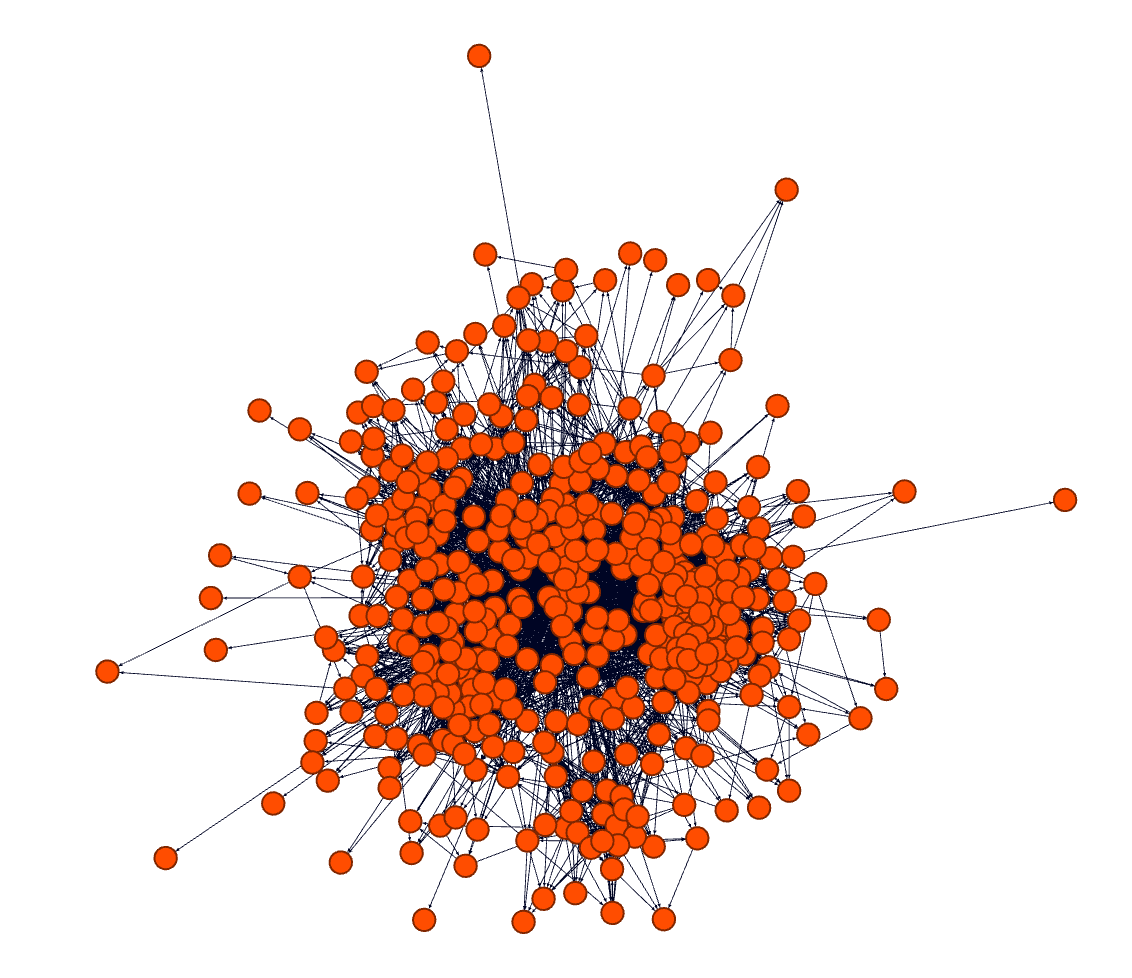

In [119]:
# Yifan Hu layout
from IPython.display import Image
Image('images/graph_yifun.png')

In the last graph the nodes' size and colour present their degree (number of its nearest neighbours).

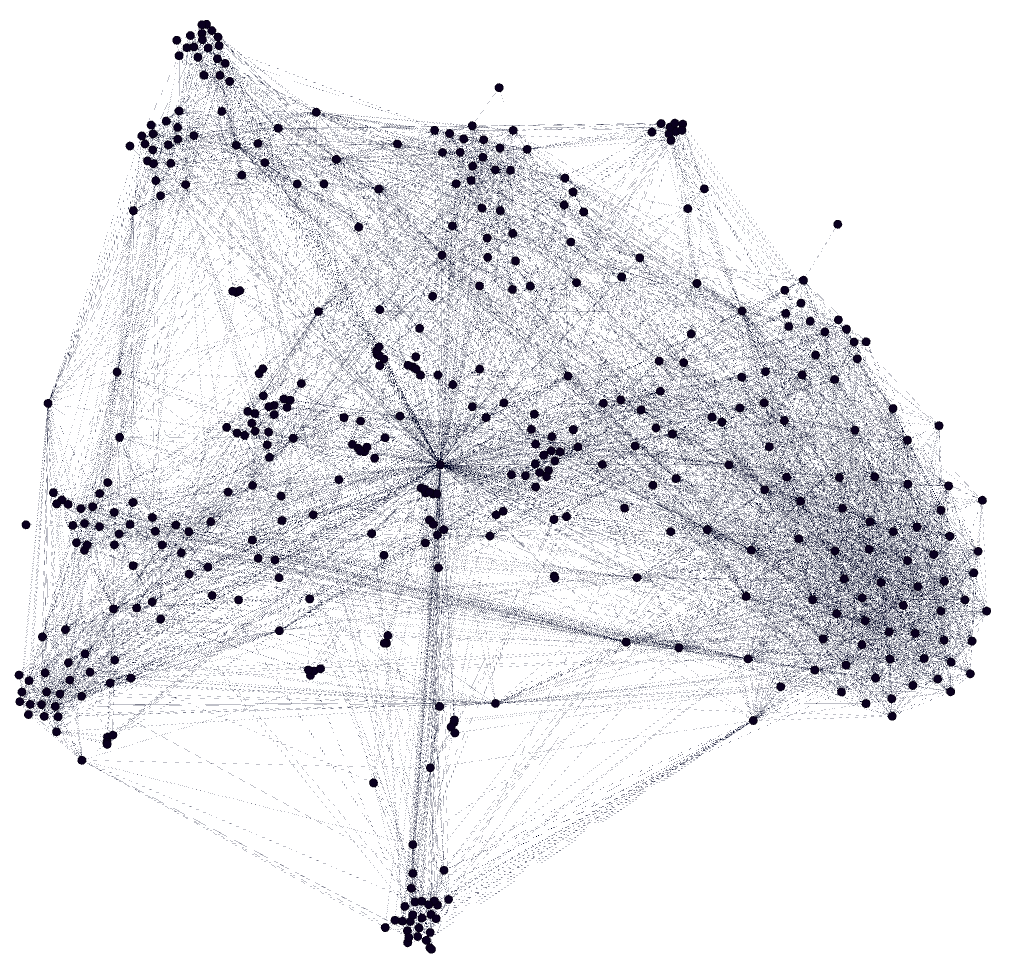

In [120]:
# ForceAtlas2
# With LingLog mode on
from IPython.display import Image
Image('images/graph_force_atlas2.png')

# Structural Analysis. Centrality metrics

If we try to interpret the degree, betweenness and closeness centrality metrics, we may say the following:
* High **degree centrality** identifies those guys who share with me a lot of friends. <br>

The importance of a node is determined by the number of nodes adjacent to it. The larger the degree, the more import the node is. Only a small number of nodes have high degrees in many real-life networks.

Degree centrality of node = sum of all its edges.

If its normalized: sum of all its edges / (number of all nodes - 1)

<img src='images/dc.png' height=100 width=600>

In [ ]:
dc = nx.centrality.degree_centrality(sub_graph)

df = pd.DataFrame(dc.items(), columns=['friend','degree_centrality'])
df.sort_values('degree_centrality', ascending=False).head(10)

* **Closeness centrality** shows the closest friends who know my other friends indirectly (the length of the shortest paths between the node and all other nodes in the graph). <br>

 <center> $CC (i) = \frac{N - 1}{\sum_jd(i, j)}$, </center>

where N is the number of nodes, $i \neq j$, and $d_{ij}$ is the length of the shortest path between nodes $i$ and $j$ in the network. 

<img src='images/cc.png' height=100 width=700>

In [ ]:
cc = nx.centrality.closeness_centrality(sub_graph)

df = pd.DataFrame(cc.items(), columns=['node','cc_centrality'])
df.sort_values('cc_centrality', ascending=False).head(5)

* **Betwenness centrality** helps to see those who connect diverse groups with each other. <br>

Node betweenness counts the number of shortest paths that pass one node. Nodes with high betweenness are important in communication and information diffusion.

For nodes $s \neq t \neq i $:

**Betwenness centrality of node $i$** = the number of shortest paths between node $s$ and node $t$ / the number of shortest paths between node $s$ and node $t$ through node $i$.

<img src='images/bc.png' height=100 width=700>

In [ ]:
bc = nx.centrality.betweenness_centrality(sub_graph)

df = pd.DataFrame(bc.items(), columns=['friend','btw_centrality'])
df.sort_values('btw_centrality', ascending=False).head(5)

# Clusters (communities)

In [130]:
!pip install python-igraph --user

     |████████████████████████████████| 2.2 MB 840 kB/s eta 0:00:01


In [79]:
import igraph as ig

nx.write_gml(sub_graph, 'G_connected.gml')
iG = ig.read('G_connected.gml')
communities = ig.Graph.community_fastgreedy(iG)
clusters = communities.as_clustering()

In [82]:
len(clusters)

13

In [94]:
clusters[0][:5]

[0, 9, 10, 11, 17]

In [98]:
# Save clusters with names instead of indices

list_of_clusters = [[] for i in range(len(clusters))]

for i in range(len(clusters)): # 13
    for j in range(len(clusters[i])): # number of friends in one cluster
        list_of_clusters[i].append(list(sub_graph.nodes())[clusters[i][j]])

In [112]:
list_of_clusters = list_of_clusters[:7]

In [113]:
col = ['#ff5e3a', '#ff2a68', '#0bd318', '#5ac8fb', '#1c86ee', '#5856d6', '#2b2b2b']
color = []
i = 0
for x in list_of_clusters[:7]: # first seven clusters
    print(len(x))
    color.append([col[i] for d in x])
    i += 1

125
140
111
13
13
9
6


In [114]:
# Position nodes using Fruchterman-Reingold force-directed algorithm
pos = nx.fruchterman_reingold_layout(sub_graph)

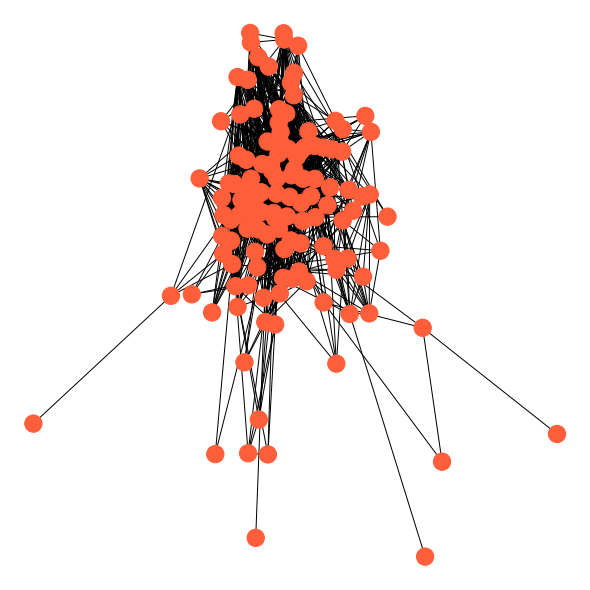

In [115]:
#import seaborn
plt.figure(figsize=(8,8))
nx.draw(sub_graph.subgraph(clss[0]), node_color = color[0], pos=pos)

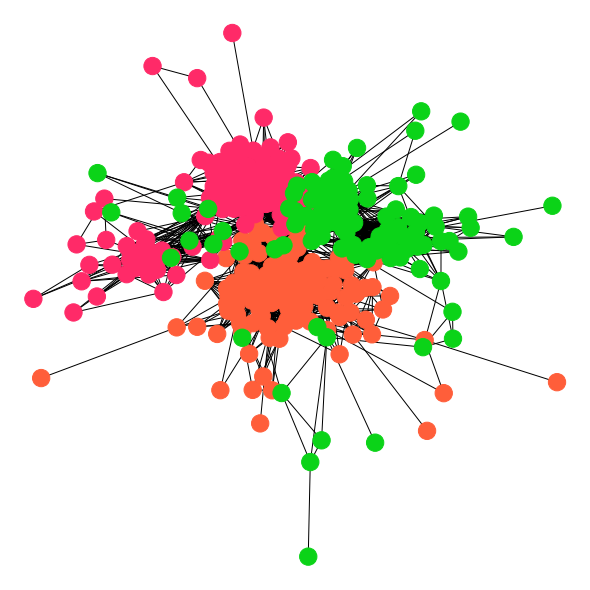

In [116]:
plt.figure(figsize=(8,8))
nx.draw(sub_graph.subgraph(clss[0]), node_color = color[0], pos=pos)
nx.draw(sub_graph.subgraph(clss[1]), node_color = color[1], pos=pos)
nx.draw(sub_graph.subgraph(clss[2]), node_color = color[2], pos=pos)

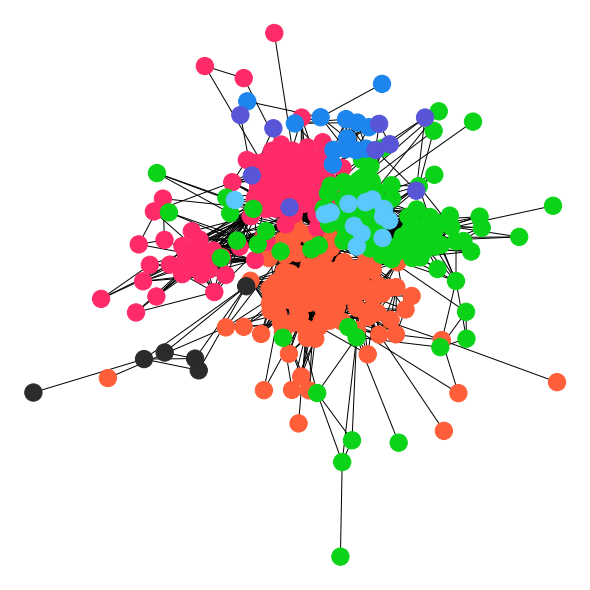

In [117]:
plt.figure(figsize=(8,8))
for i in range(len(list_of_clusters)):
    nx.draw(sub_graph.subgraph(clss[i]), node_color = color[i], pos=pos)

Summing up, we have identified 7 communities and visualized them step by step. 